In [1]:
l = """Sunny	No
Sunny	No
Overcast	Yes
Rainy	Yes
Rainy	Yes
Rainy	No
Overcast	Yes
Sunny	Yes
Sunny	Yes
Rainy	No
Sunny	Yes
Overcast	Yes
Overcast	Yes
Rainy	No"""

In [2]:
d = [_.split("\t") for _ in l.split("\n")]

In [3]:
import math

In [4]:
0.6 * math.log(0.6, 2) + 0.4 * math.log(0.4, 2)

-0.9709505944546686

In [5]:
0.4 * math.log(0.4, 2) + 0.6 * math.log(0.6, 2)

-0.9709505944546686

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Load the Iris dataset
data = load_iris()
X = data.data          # Feature matrix
y = data.target        # Target vector

# Display dataset information
print("Feature Names:", data.feature_names)
print("Target Names:", data.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)


In [8]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

# Calculate and print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



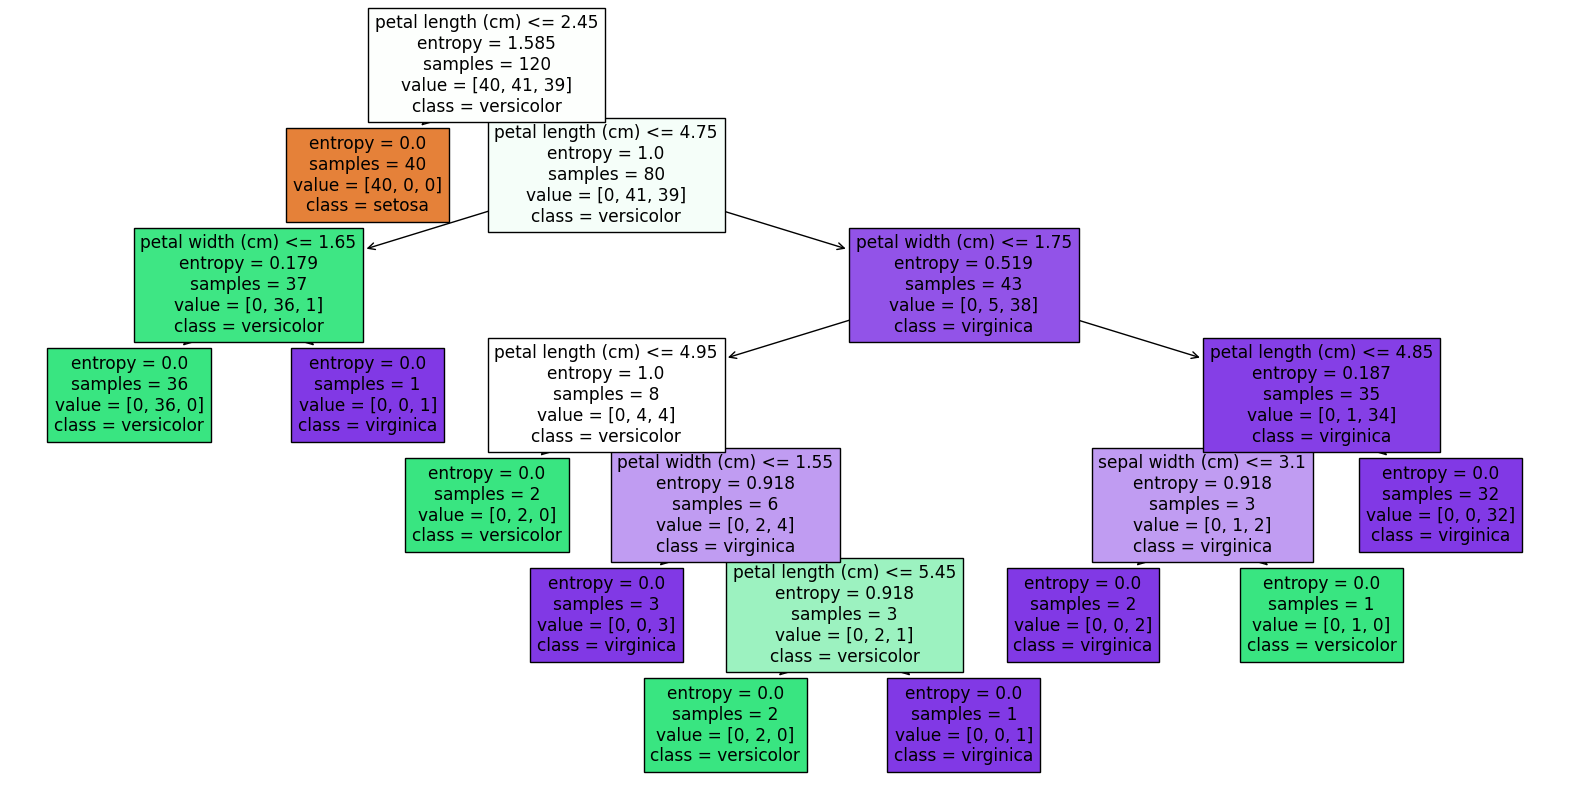

In [10]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

In [11]:
# Example of a new unseen sample (replace these values as desired)
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])  # Sample representing a setosa-like flower

# Predict the class for the new sample
predicted_class = dt.predict(new_sample)

# Display the prediction
print("Predicted Class:", data.target_names[predicted_class[0]])

Predicted Class: setosa


### Random Forests

In [12]:
# Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Display confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



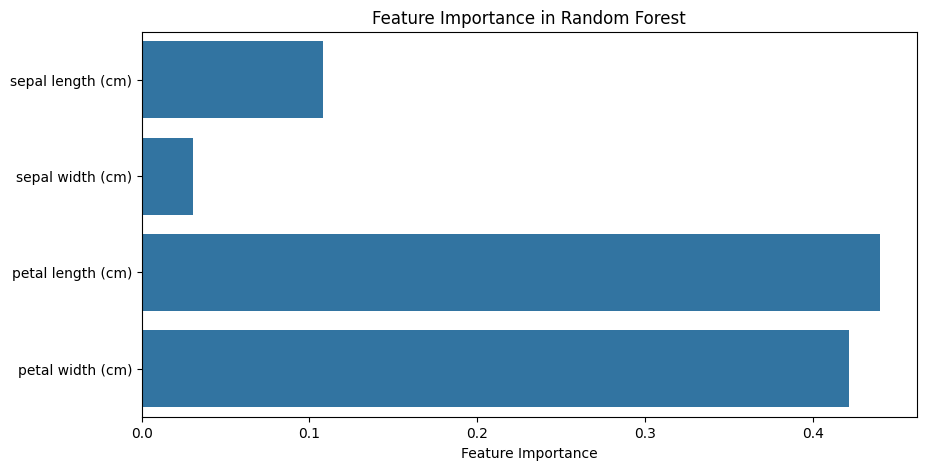

In [14]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = data.feature_names

# Plot the feature importances
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [15]:
# New unseen sample (replace values as desired)
new_sample = np.array([[5.8, 2.7, 4.1, 1.0]])  # Example with 4 features

# Predict the class for the new sample
predicted_class_rf = rf.predict(new_sample)

# Display the predicted class
print("Predicted Class:", data.target_names[predicted_class_rf[0]])

Predicted Class: versicolor
